<center>
    <h2><b>Homework 2</b></h2>

Martim Aires de Sousa - 106468  
Cristiano Pantea - 106324
</center>

### **Loading dataset**

In [1]:
import pandas as pd

# Loading dataset
df = pd.read_csv('heart-disease.csv')

# Split features and target
X = df.drop('target', axis=1)
y = df['target']

### **Exercício 1**

#### **a)**

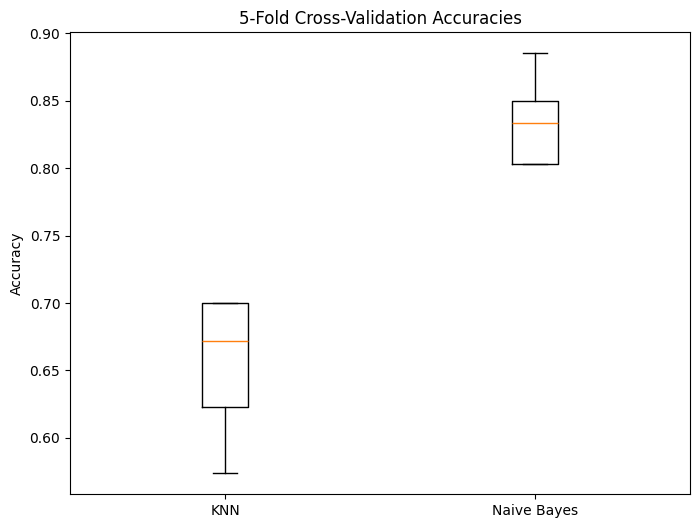

KNN Fold Accuracies: [0.62295082 0.57377049 0.67213115 0.7        0.7       ]
Naive Bayes Fold Accuracies: [0.8852459  0.80327869 0.80327869 0.85       0.83333333]


In [2]:
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Initialize the models
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()

# Stratified K-Fold Cross-Validation with shuffling
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Evaluate KNN with 5-fold cross-validation
knn_accuracies = cross_val_score(knn, X, y, cv=skf, scoring='accuracy')

# Evaluate Naive Bayes with 5-fold cross-validation
nb_accuracies = cross_val_score(nb, X, y, cv=skf, scoring='accuracy')

# Boxplot of accuracies
plt.figure(figsize=(8, 6))
plt.boxplot([knn_accuracies, nb_accuracies], tick_labels=['KNN', 'Naive Bayes'])
plt.title('5-Fold Cross-Validation Accuracies')
plt.ylabel('Accuracy')
plt.show()

# Print the fold accuracies for each model
print(f"KNN Fold Accuracies: {knn_accuracies}")
print(f"Naive Bayes Fold Accuracies: {nb_accuracies}")

Como mostram os resultados, Naive Bayes é mais estável do que KNN. Isto explica-se pelo facto de assumir uma distribuição Gaussiana (para features contínuas), o que permite generalizar melhor.  

Por outro lado, o modelo KNN é não paramétrico, o que torna a sua performance muito dependente da estrutura do dataset e do número de K escolhido.

#### **b)**

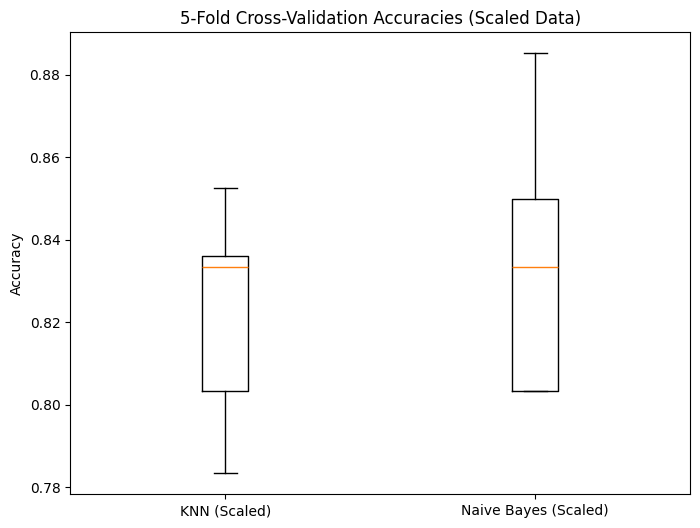

KNN (Scaled) Fold Accuracies: [0.83606557 0.80327869 0.85245902 0.83333333 0.78333333]
Naive Bayes (Scaled) Fold Accuracies: [0.8852459  0.80327869 0.80327869 0.85       0.83333333]


In [3]:
# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Apply Min-Max scaling to the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the models
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()

# Stratified K-Fold Cross-Validation with shuffling
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Evaluate KNN with scaled data using 5-fold cross-validation
knn_scaled_accuracies = cross_val_score(knn, X_scaled, y, cv=skf, scoring='accuracy')

# Evaluate Naive Bayes with scaled data using 5-fold cross-validation
nb_scaled_accuracies = cross_val_score(nb, X_scaled, y, cv=skf, scoring='accuracy')

# Boxplot of accuracies for scaled data
plt.figure(figsize=(8, 6))
plt.boxplot([knn_scaled_accuracies, nb_scaled_accuracies], tick_labels=['KNN (Scaled)', 'Naive Bayes (Scaled)'])
plt.title('5-Fold Cross-Validation Accuracies (Scaled Data)')
plt.ylabel('Accuracy')
plt.show()

# Print the fold accuracies for each model after scaling
print(f"KNN (Scaled) Fold Accuracies: {knn_scaled_accuracies}")
print(f"Naive Bayes (Scaled) Fold Accuracies: {nb_scaled_accuracies}")

Como o modelo KNN é baseado nas distâncias entre observações, pré-dimensionar as features faz com que nenhuma domine as outras (devido a uma possível maior gama de valores). Desta forma, com o pré-dimensionamento dos dados, o algoritmo vai ser sensível a todas as features de uma forma mais equalitária, permitindo que o modelo tenha uma performance melhor e mais consistente.  

Relativamente ao modelo Naive Bayes, verificamos que o pré-processamento dos dados não tem um grande impacto. Isto deve-se ao facto de este modelo se basear na 'likelihood' de cada feature, independentemente (como uma distribuição Gaussiana). Aplicar um pré-dimensionamento aos dados não irá alterar a forma da distribuição (apenas a gama de valores), portanto é normal que não haja uma mudança significativa na performance.

#### **c)**

In [4]:
from scipy import stats

t_stat, p_value = stats.ttest_rel(knn_accuracies, nb_accuracies, alternative='greater')

print(f"T-statistic: {t_stat}")
print(f"One-tailed p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. KNN is statistically superior to Naive Bayes.")
else:
    print("Fail to reject the null hypothesis. KNN is not statistically superior to Naive Bayes.")


T-statistic: -6.690315237001677
One-tailed p-value: 0.9987020187220139
Fail to reject the null hypothesis. KNN is not statistically superior to Naive Bayes.


### **Exercício 2**

#### **a)**

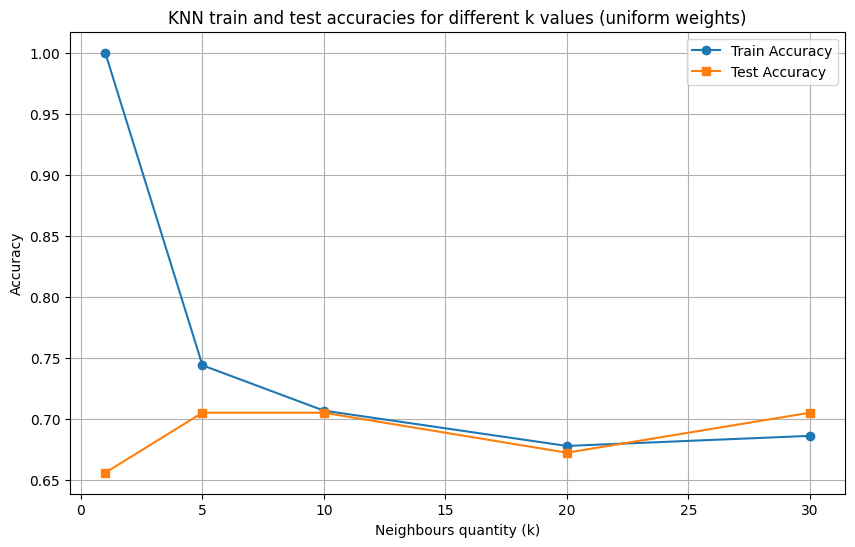

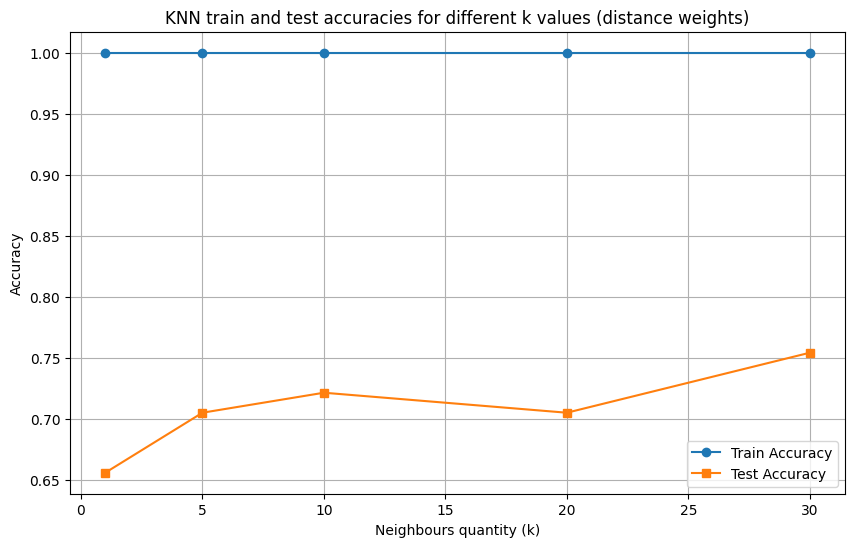

In [5]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def plot_graph(train_accuracies, test_accuracies, title):
    # Plot the information
    plt.figure(figsize=(10, 6))

    # Train accuracies
    plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')

    # Test accuracies
    plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='s')

    # Title and labels
    plt.xlabel('Neighbours quantity (k)')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Number of different neighbours to consider
k_values = [1, 5, 10, 20, 30]

# Lists to store the accuracies for both train and test
train_accuracies_uniform = []
test_accuracies_uniform = []

train_accuracies_distance = []
test_accuracies_distance= []

# Fit the classifier for different k values
for k in k_values:
    # KNN using uniform weights
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn.fit(X_train, y_train)
    
    # Calculate train and test accuracy for k neighbours
    train_accuracies_uniform.append(accuracy_score(y_train, knn.predict(X_train)))
    test_accuracies_uniform.append(accuracy_score(y_test, knn.predict(X_test)))


    # KNN using uniform distances
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    
    # Calculate train and test accuracy for k neighbours
    train_accuracies_distance.append(accuracy_score(y_train, knn.predict(X_train)))
    test_accuracies_distance.append(accuracy_score(y_test, knn.predict(X_test)))

plot_graph(train_accuracies_uniform, test_accuracies_uniform, 'KNN train and test accuracies for different k values (uniform weights)')
plot_graph(train_accuracies_distance, test_accuracies_distance, 'KNN train and test accuracies for different k values (distance weights)')


#### **b)**

O número de vizinhos (k) no algoritmo K-Nearest Neighbors (KNN) influencia bastante a capacidade do modelo de generalizar, interpretar novos dados e realizar classificações mais precisas.

À medida que aumentamos o número de vizinhos (k) no algoritmo K-Nearest Neighbors (KNN), observamos mudanças significativas na forma como o modelo se generaliza para novos dados.
Quando  k é pequeno, como por exemplo k=1, o modelo torna-se muito complexo e excessivamente sensível ao ruído presente nos dados de treino. Isto acontece porque o classificador toma decisões com base apenas no vizinho mais próximo o que resulta num overfitting. Neste caso, o modelo ajusta-se tanto aos dados de treino que perde a capacidade de generalizar para dados novos. Por exemplo, se houver um ponto mal classificado ou atípico nos dados de treino, o modelo vai seguir esse erro, o que prejudica o seu desempenho em situações novas. Assim, o modelo pode ter uma precisão muito alta com os dados de treino, mas uma precisão muito baixa com os de teste.

Por outro lado, quando aumentamos o valor de k para um valor moderado, como k=5 ou k=10, o modelo começa a equilibrar-se melhor. Aqui, ele leva em consideração mais vizinhos para fazer as previsões, o que o torna menos suscetível a pontos ruidosos ou atípicos. Em vez de se basear apenas nos detalhes locais, o KNN passa a captar padrões mais globais nos dados, o que melhora a sua capacidade de generalização.

Contudo, se k for muito elevado, como k=20 ou k=30, o modelo torna-se demasiado simples. Neste caso, ele começa a incluir tantos vizinhos na decisão que perde a capacidade de capturar padrões mais específicos dos dados. O resultado é um modelo mais genérico que não se ajusta bem aos dados de treino nem aos de teste (underfitting). O modelo torna-se então incapaz de reconhecer a complexidade dos dados e a precisão geral pode diminuir.

### **Exercício 3**

Ao aplicar o modelo de Naïve Bayes ao conjunto de dados do ficheiro heart-disease.csv, é possível identificar duas dificuldades principais relacionadas às suas propriedades específicas.

A primeira dificuldade surge do facto de se assumir uma independência entre as features. O modelo Naïve Bayes baseia-se na hipótese de que todas as variáveis (ou features) são independentes entre si, o que raramente corresponde à realidade em conjuntos de dados médicos. No caso do dataset de doenças cardíacas, é provável que muitas das variáveis, como a pressão arterial, o nível de colesterol, a idade e o histórico de doenças cardíacas, estejam correlacionadas. Por exemplo, indivíduos com pressão arterial elevada podem ter, ao mesmo tempo, níveis de colesterol mais elevados, e certas faixas etárias podem ser mais propícias a doenças cardíacas quando combinadas com outros fatores de risco. Esta correlação entre variáveis viola a principal suposição do Naïve Bayes, o que pode resultar num desempenho inferior do modelo, já que este não consegue capturar essas relações entre as variáveis.

A segunda dificuldade está relacionada com o tratamento de variáveis contínuas com distribuições não gaussianas. O Naïve Bayes Gaussiano, frequentemente utilizado para dados contínuos, assume que as variáveis seguem uma distribuição normal (gaussiana). No entanto, é possível que no conjunto de dados heart-disease.csv, variáveis como idade, níveis de colesterol ou frequência cardíaca não sigam essa distribuição de forma ideal. Se as distribuições reais das variáveis contínuas se desviarem da normalidade, o modelo pode ter dificuldade em representar adequadamente a distribuição dos dados, o que prejudica a sua capacidade de fazer previsões precisas.